In [2]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

##  Question 1 

  File "C:\Users\etulyon1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


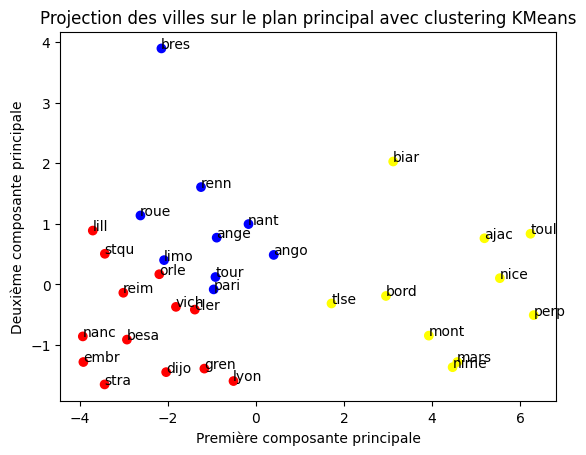

In [3]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib

# Charger les données
data = pd.read_csv('villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Appliquer KMeans pour obtenir 3 clusters
kmeans = KMeans(n_clusters=3)
clustering = kmeans.fit_predict(X_scaled)

# Visualisation graphique des villes projetées dans le plan principal avec des couleurs différentes pour chaque cluster
colors = ['red', 'yellow', 'blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title('Projection des villes sur le plan principal avec clustering KMeans')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()


## Question 2 

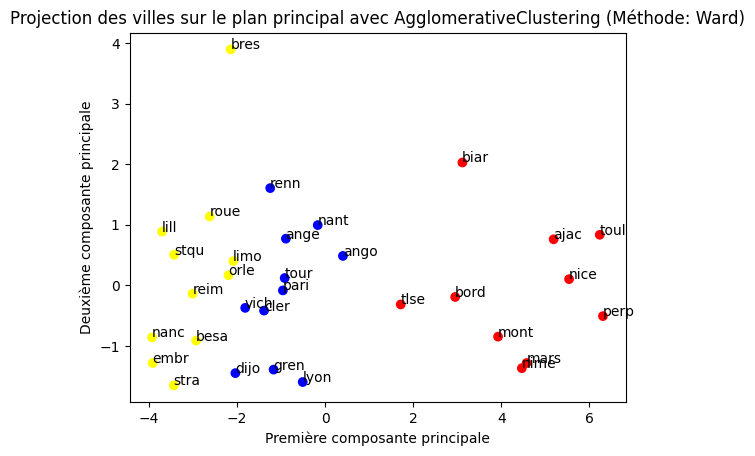

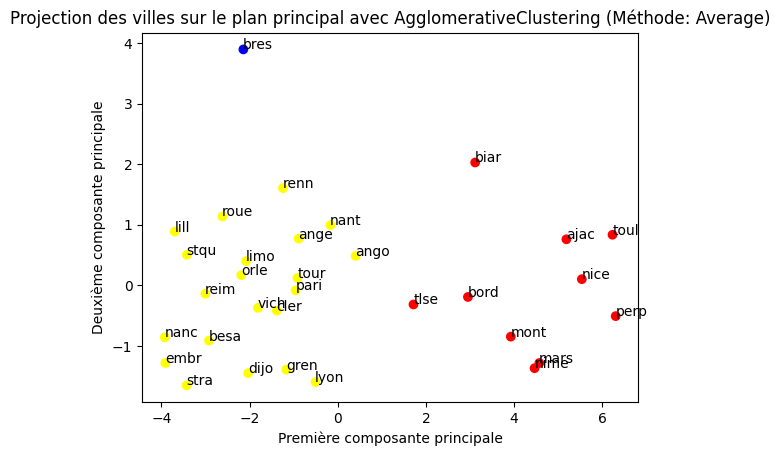

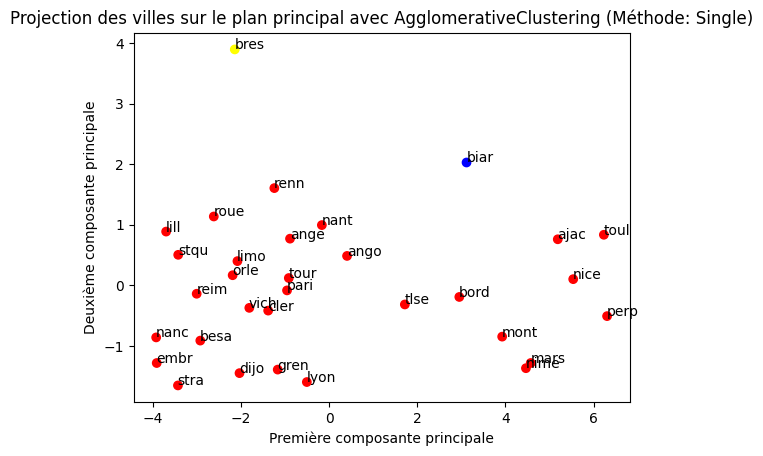

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib

# Charger les données
data = pd.read_csv('villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Appliquer AgglomerativeClustering avec différentes méthodes d'agrégation
methods = ['ward', 'average', 'single']
for method in methods:
    # Appliquer AgglomerativeClustering
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    clustering_labels = clustering.fit_predict(X_scaled)
    
    # Visualisation graphique des villes projetées dans le plan principal avec des couleurs différentes pour chaque cluster
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering_labels, cmap=matplotlib.colors.ListedColormap(colors))
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.title(f'Projection des villes sur le plan principal avec AgglomerativeClustering (Méthode: {method.capitalize()})')
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()


## Question 3

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Charger les données
data = pd.read_csv('villes.csv', sep=';')
X = data.iloc[:, 1:].values

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialiser les variables pour stocker les résultats de l'indice Silhouette
best_score = -1
best_k = -1

# Boucle sur les différentes partitions possibles
for k in range(2, 7):
    # Appliquer KMeans
    kmeans = KMeans(n_clusters=k)
    clustering_labels = kmeans.fit_predict(X_scaled)
    
    # Calculer l'indice Silhouette
    silhouette_avg = silhouette_score(X_scaled, clustering_labels)
    
    # Mettre à jour la meilleure partition si l'indice Silhouette est maximal
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"La meilleure partition correspond à {best_k} clusters avec un indice Silhouette de {best_score:.4f}.")


La meilleure partition correspond à 2 clusters avec un indice Silhouette de 0.6256.


## Question 4

In [20]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Charger les données
data = pd.read_csv('villes.csv', sep=';')
X = data.iloc[:, 1:].values

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialiser les variables pour stocker les résultats de l'indice Silhouette
best_score = -1
best_k = -1
best_method = ""

# Boucle sur les différentes partitions possibles et méthodes d'agrégation
for k in range(2, 7):
    for method in ['ward', 'average', 'single']:
        # Appliquer AgglomerativeClustering
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        clustering_labels = clustering.fit_predict(X_scaled)

        # Calculer l'indice Silhouette
        silhouette_avg = silhouette_score(X_scaled, clustering_labels)

        # Mettre à jour la meilleure partition si l'indice Silhouette est maximal
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_k = k
            best_method = method

print(f"La meilleure partition correspond à {best_k} clusters avec la méthode d'agrégation {best_method} et un indice Silhouette de {best_score:.4f}.")


La meilleure partition correspond à 2 clusters avec la méthode d'agrégation ward et un indice Silhouette de 0.6256.


## Question 5

In [21]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Charger les données
data = pd.read_csv('villes.csv', sep=';')
X = data.iloc[:, 1:].values

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialiser les variables pour stocker les résultats de l'indice Silhouette
best_score = -1
best_method = ""

# Boucle sur les différentes méthodes d'agrégation
for method in ['ward', 'average', 'single']:
    # Appliquer AgglomerativeClustering
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    clustering_labels = clustering.fit_predict(X_scaled)

    # Calculer l'indice Silhouette
    silhouette_avg = silhouette_score(X_scaled, clustering_labels)

    # Mettre à jour la meilleure méthode si l'indice Silhouette est maximal
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_method = method

print(f"La meilleure méthode d'agrégation pour 3 clusters est {best_method} avec un indice Silhouette de {best_score:.4f}.")


La meilleure méthode d'agrégation pour 3 clusters est average avec un indice Silhouette de 0.4957.


## Question 6


Les méthodes de classification hiérarchiques (telles que AgglomerativeClustering) et les méthodes de partitionnement (telles que KMeans) ont leurs propres avantages et inconvénients. Voici une comparaison des deux :

### AgglomerativeClustering (méthodes de classification hiérarchiques) :

**Avantages :**
1. **Interprétabilité :** Les résultats de la classification hiérarchique peuvent être représentés sous forme de dendrogramme, ce qui permet une visualisation facile des relations entre les clusters.
2. **Pas besoin de spécifier le nombre de clusters à l'avance :** Contrairement à KMeans, AgglomerativeClustering n'a pas besoin de spécifier le nombre de clusters à l'avance, ce qui peut être utile lorsque le nombre de clusters n'est pas connu à l'avance.
3. **Robuste aux formes non sphériques :** AgglomerativeClustering peut fonctionner efficacement sur des clusters de formes arbitraires.

**Inconvénients :**
1. **Complexité :** La complexité algorithmique d'AgglomerativeClustering est relativement élevée, en particulier pour un grand nombre d'échantillons.
2. **Sensibilité aux outliers :** Comme la méthode hiérarchique est basée sur la similarité entre les échantillons, elle peut être sensible aux outliers.
3. **Coût de calcul :** Le coût de calcul peut être élevé, en particulier pour les grands ensembles de données, car il doit calculer la matrice de distance complète entre tous les échantillons.

### KMeans (méthodes de partitionnement) :

**Avantages :**
1. **Efficace pour de grands ensembles de données :** KMeans est souvent plus rapide que les méthodes hiérarchiques pour de grands ensembles de données.
2. **Facile à comprendre et à mettre en œuvre :** KMeans est relativement simple à comprendre et à mettre en œuvre, ce qui le rend largement utilisé et largement disponible dans les bibliothèques de machine learning.
3. **Résultats déterministes :** KMeans donne des résultats déterministes pour un nombre de clusters donné, ce qui signifie que l'algorithme converge toujours vers le même résultat pour le même ensemble de données et le même nombre de clusters.

**Inconvénients :**
1. **Sensible au choix initial des centroïdes :** Les résultats de KMeans dépendent fortement du choix initial des centroïdes, ce qui peut conduire à des résultats différents à chaque exécution.
2. **Nécessité de spécifier le nombre de clusters :** Contrairement à AgglomerativeClustering, il est nécessaire de spécifier le nombre de clusters à l'avance, ce qui peut être difficile à déterminer.
3. **Sensible à la forme des clusters :** KMeans suppose que les clusters sont de forme sphérique et de taille égale, ce qui peut entraîner de mauvaises performances sur des données de forme non sphérique ou de taille inégale.

En résumé, AgglomerativeClustering est souvent préféré lorsque l'interprétabilité et la flexibilité dans le nombre de clusters sont importants, tandis que KMeans est généralement utilisé pour sa simplicité, son efficacité et sa disponibilité.


## Question 7

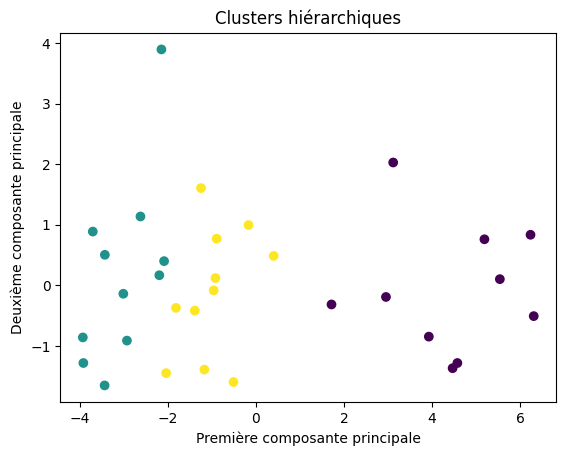

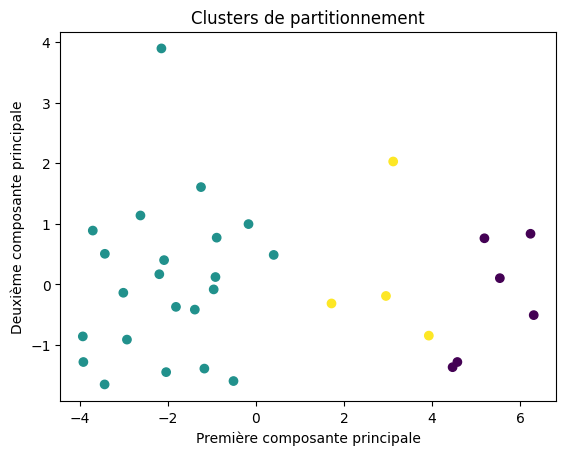

In [22]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def hybrid_clustering(X, n_clusters_hierarchical, n_clusters_partitioning):
    # Phase hiérarchique
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
    hierarchical_labels = hierarchical_clustering.fit_predict(X)
    
    # Réduction de dimensions pour la visualisation
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Visualisation des clusters hiérarchiques
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
    plt.title('Clusters hiérarchiques')
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()
    
    # Phase de partitionnement
    partitioning_clustering = KMeans(n_clusters=n_clusters_partitioning)
    partitioning_labels = partitioning_clustering.fit_predict(X)
    
    # Visualisation des clusters de partitionnement
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=partitioning_labels, cmap='viridis')
    plt.title('Clusters de partitionnement')
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()
    
    return hierarchical_labels, partitioning_labels

# Charger les données
data = pd.read_csv('villes.csv', sep=';')
X = data.iloc[:, 1:].values

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'approche hybride avec 3 clusters hiérarchiques et 3 clusters de partitionnement
hierarchical_labels, partitioning_labels = hybrid_clustering(X_scaled, n_clusters_hierarchical=3, n_clusters_partitioning=3)


## Question 8 

Clustering pour wdbc.csv :
Silhouette Score: 0.3151862330494096


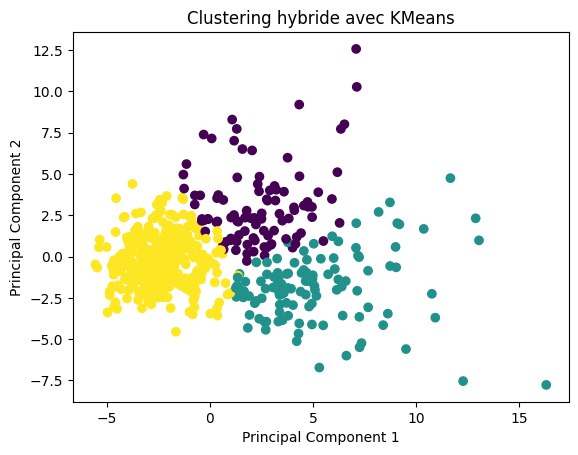


Clustering pour spamb.csv :
Silhouette Score: 0.1260820649083139


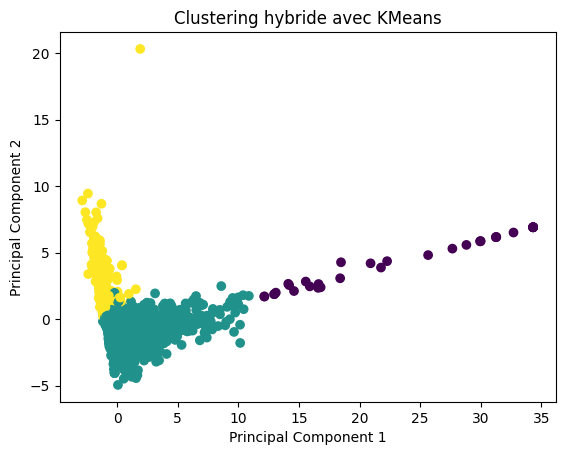

In [29]:


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fonction de clustering hybride
def hybrid_clustering(data, n_clusters):
    # Standardiser les données
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Réduction de dimensions avec PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)
    
    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    
    # Score silhouette
    silhouette_avg = silhouette_score(data_scaled, labels)
    print("Silhouette Score:", silhouette_avg)
    
    # Visualisation des clusters
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
    plt.title("Clustering hybride avec KMeans")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Charger les jeux de données
wdbc_data = pd.read_csv('wdbc.csv', header=None, delimiter=';')
spamb_data = pd.read_csv('spamb.csv', header=None, delimiter=';')

# Appliquer le clustering hybride
print("Clustering pour wdbc.csv :")
hybrid_clustering(wdbc_data, n_clusters=3)

print("\nClustering pour spamb.csv :")
hybrid_clustering(spamb_data, n_clusters=3)



